In [3]:
!where python

c:\Users\brand\anaconda3\envs\iris-dataset\python.exe
C:\Python312\python.exe
C:\Users\brand\anaconda3\python.exe
C:\Users\brand\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\brand\AppData\Local\Microsoft\WindowsApps\python.exe


In [4]:
# This tells the NB to keep an eye on the other Python files I import so if i change them pyter will automatically reload the latest version so we do not have to manually re-import stuff
%load_ext autoreload 

# This means it's gonna reload everything everytime I run a cell 
%autoreload 2

# This tells Jupyter to show graphs and charts inside the notebook instead of popping up in separate windows
%matplotlib inline

In [5]:
# Standard imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Local imports

In [6]:
# This updates plotting styles this is seaborns plotting styles
sns.set()

In [17]:
mnist = pd.read_csv("MNIST_100.csv")

# Reset the index of the dataframe
mnist = mnist.iloc[1:].reset_index(drop=True)

# Check the updated dataframe
print(mnist.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      0       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [8]:
housing = pd.read_csv("housing_training.csv", header=None)

housing_A = housing.iloc[:, 0]

housing = housing.iloc[:, [10, 12, 13]]
housing.columns = ["K", "M", "N"]

housing_A.columns = "A"

housing_A

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
295    0.12932
296    0.05372
297    0.14103
298    0.06466
299    0.05561
Name: 0, Length: 300, dtype: float64

In [9]:
labels = mnist[mnist.columns[0]]
pixels = mnist[mnist.columns[0:]]
print(pixels)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0        0       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        0       0       0       0       0       0       0       0       0   
3        0       0       0       0       0       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
994      9       0       0       0       0       0       0       0       0   
995      9       0       0       0       0       0       0       0       0   
996      9       0       0       0       0       0       0       0       0   
997      9       0       0       0       0       0       0       0       0   
998      9       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [10]:
mnist_pca = PCA(n_components=2)
mnist_pca_2d = mnist_pca.fit_transform(pixels)

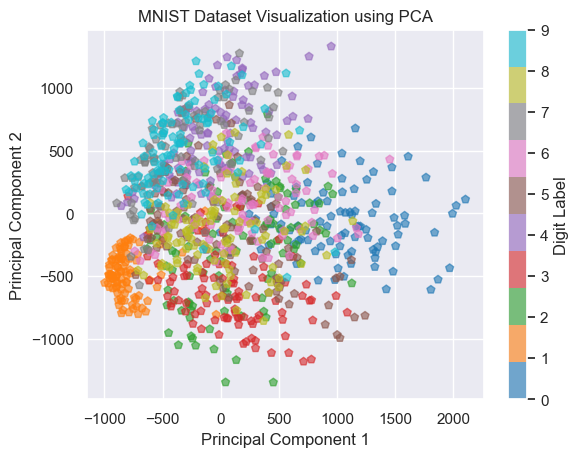

In [11]:
graph = plt.scatter(mnist_pca_2d[:, 0], mnist_pca_2d[:, 1], c=labels, cmap='tab10', marker='p', alpha=.6)
plt.colorbar(graph, ticks=range(10), label="Digit Label")
plt.title("PCA Visualization of MNIST Data (2D Projection)")
plt.title("MNIST Dataset Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [16]:
housing_Labels = housing.columns.tolist()
print(housing_Labels)

['K', 'M', 'N']


In [13]:
housing_pca = PCA(n_components=2)
housing_pca_2d = housing_pca.fit_transform(pixels)

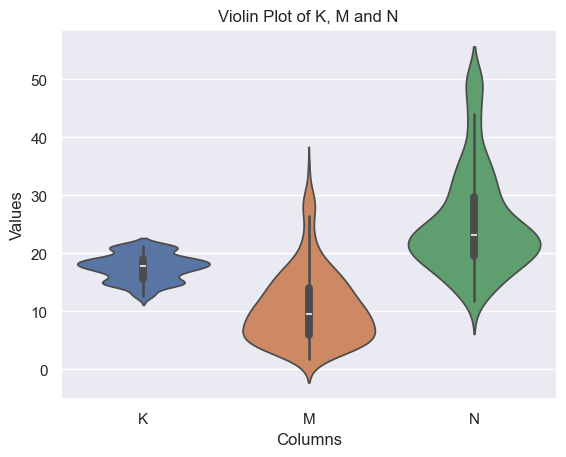

In [14]:
sns.violinplot(data=housing)
plt.title("Violin Plot of K, M and N")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

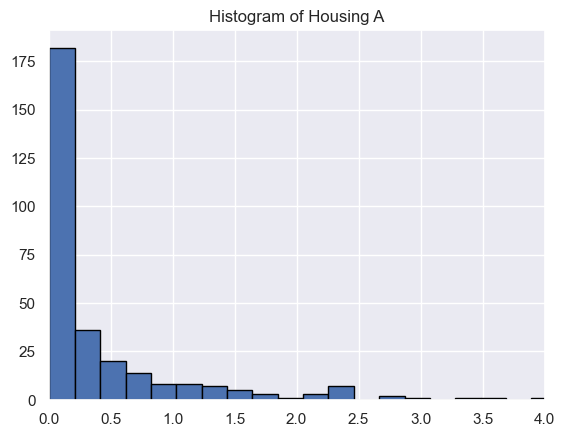

In [15]:
plt.hist(housing_A, bins=20, edgecolor="black")
plt.title("Histogram of Housing A")
plt.xlim(0, 4)
plt.show()